## 데이터 추출

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks') # 그래프를 seaborn 스타일로 그리기
plt.rc('font', family = 'AppleGothic') # 한글 처리

In [9]:
# 데이터 크롤링 모듈
from selenium import webdriver
from bs4 import BeautifulSoup
import re

In [7]:
data = pd.read_csv('data/Regular_Season_Batter.csv')
data.head(5)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [6]:
data.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [10]:
data['year'].value_counts()
# data['starting_salary'].value_counts()

2018    227
2017    217
2016    213
2015    207
2013    194
2014    186
2012    174
2011    151
2010    130
2009    124
2008    115
2007     98
2006     85
2005     73
2004     68
2003     54
2002     43
2001     32
2000     20
1999     14
1998     10
1997      8
1996      7
1994      2
1993      1
1995      1
Name: year, dtype: int64

In [10]:
# 연봉 단위: 만원. 다시 10000으로 나눠서 억으로 변환하기
xls = pd.ExcelFile('연봉.xlsx')
df = pd.read_excel(xls, '팀별연도별')
df['총액(억)'] = df['총액'] / 10000
df['평균(억)'] = df['평균'] / 10000
df

,팀,연도,선수 수,총액,평균,총액(억),평균(억)
0,두산,2008,NaN,374600,NaN,37.46,NaN
1,두산,2009,NaN,359600,NaN,35.96,NaN
2,두산,2010,NaN,405200,NaN,40.52,NaN
3,두산,2011,NaN,454900,NaN,45.49,NaN
4,두산,2012,NaN,484900,NaN,48.49,NaN
...,...,...,...,...,...,...,...
113,SK,2016,54.0,701400,12988.888889,70.14,1.298889
114,SK,2017,51.0,753000,14764.705882,75.30,1.476471
115,SK,2018,53.0,820000,15472.000000,82.00,1.547200
116,SK,2019,53.0,961500,18141.509434,96.15,1.814151


In [157]:
df['팀'].unique()

array(['두산', '롯데', '삼성', '키움', '한화', 'KIA', 'KT', 'LG', 'NC', 'SK'],
      dtype=object)

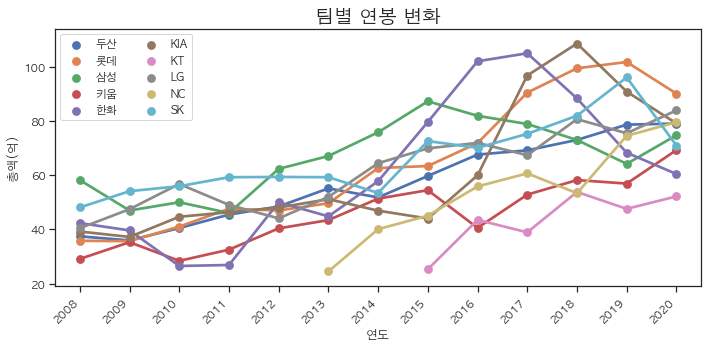

In [158]:
plt.figure(figsize = (10, 5))
gt = sns.pointplot(x = '연도', y = '총액(억)', data = df, hue = '팀')
# order = ['티저', '1화', '2화', '3화', '4화']) #평균이 높이, 편차가 error bar
# gt.set_xlabel("에피소드", fontsize = 17)
# gt.set_ylabel('CPV', fontsize = 18)
gt.set_title("팀별 연봉 변화", fontsize = 19)
# gt.set(ylim = (0, 30))

gt.set_xticklabels(
    gt.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)
gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('../plot/gross.png', dpi = 300)
plt.show()

In [292]:
# 크롤링 위한 웹드라이버
driver = webdriver.Chrome('../chromedriver')

In [78]:
# 팀별 관중수
url = 'https://www.koreabaseball.com/History/Crowd/History.aspx'
driver.get(url)

html = driver.find_element_by_id('tblHistory').get_attribute("innerHTML")
# html = driver.find_element_by_xpath('//*[@id="mytable"]/tbody').get_attribute("innerHTML")
soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
# soup

temp = [i.text.strip() for i in soup.findAll("tr")] #tr 태그에서, text만 저장하기
# \n으로 구분되어 있음.
# 1행에서 는 한번에 뽑기, 
temp = pd.Series(temp)
temp[:5] # head 보기

0    연도\n삼성\nKIA\n롯데\nLG\n두산\n한화\nSK\n키움\nNC\nKT\n현...
1    계16,604,797(6,959)15,041,765(6,307)27,587,646(...
2    2019\n691,681(9,607)\n692,163(9,613)\n679,208(...
3    2018\n752,310(10,449)\n861,729(11,968)\n901,63...
4    2017\n704,857(9,790)\n1,024,830(14,234)\n1,038...
dtype: object

In [64]:
# 열. 현대/쌍방울은 제외
temp[0].split("\n")[:11]

['연도', '삼성', 'KIA', '롯데', 'LG', '두산', '한화', 'SK', '키움', 'NC', 'KT']

In [242]:
# 첫 요소는 index, 두번째부터 관중수.
df2 = pd.DataFrame([a[:11] for a in temp[2:].apply(lambda x: x.split("\n"))], columns = temp[0].split("\n")[:11])
# df2 = pd.melt(df2, id_vars=temp[0].split("\n")[1:11])
df2 = pd.melt(df2, id_vars=['연도'])
df2

,연도,variable,value
0,2019,삼성,"691,681(9,607)"
1,2018,삼성,"752,310(10,449)"
2,2017,삼성,"704,857(9,790)"
3,2016,삼성,"851,417(11,825)"
4,2015,삼성,"524,971 (7,291)"
...,...,...,...
375,1986,KT,
376,1985,KT,
377,1984,KT,
378,1983,KT,


In [243]:
# 값 없는 행 제거 (해당 년도에 없었던 팀)
df2.drop(df2[df2['value'] == ''].index, inplace=True)

In [244]:
df2['crowd'] = df2['value'].apply(lambda x: int(x.split("(")[0].replace(",", "")))
df2['avg_crowd'] = df2['value'].apply(lambda x: int(x.split("(")[1][:-1].replace(",", "")))
df2.rename(columns = {'variable': '팀'}, inplace = True)
df2

,연도,팀,value,crowd,avg_crowd
0,2019,삼성,"691,681(9,607)",691681,9607
1,2018,삼성,"752,310(10,449)",752310,10449
2,2017,삼성,"704,857(9,790)",704857,9790
3,2016,삼성,"851,417(11,825)",851417,11825
4,2015,삼성,"524,971 (7,291)",524971,7291
...,...,...,...,...,...
342,2019,KT,"536,735(7,455)",536735,7455
343,2018,KT,"668,559(9,286)",668559,9286
344,2017,KT,"686,541(9,535)",686541,9535
345,2016,KT,"682,444(9,478)",682444,9478


In [245]:
# df2 연도 object -> 숫자로 바꾸기
df2['연도'] = df2['연도'].astype(int)
print(df2['연도'].dtype)

int64


In [246]:
df3 = pd.merge(left=df, right=df2, how='right', on=['팀','연도'], sort=True)
df3.drop(['평균', '총액', 'value'], axis = 1, inplace=True)
df3

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd
0,KIA,1982,NaN,NaN,NaN,261182,6530
1,KIA,1983,NaN,NaN,NaN,377964,7559
2,KIA,1984,NaN,NaN,NaN,196278,3926
3,KIA,1985,NaN,NaN,NaN,301188,5476
4,KIA,1986,NaN,NaN,NaN,307814,5700
...,...,...,...,...,...,...,...
263,한화,2015,NaN,79.69,NaN,657385,9130
264,한화,2016,57.0,102.10,1.791228,660472,9173
265,한화,2017,57.0,105.05,1.842982,593251,8240
266,한화,2018,53.0,88.37,1.667400,734110,10196


In [247]:
df3.groupby('팀').count()

,연도,선수 수,총액(억),평균(억),crowd,avg_crowd
팀,,,,,,
KIA,38,4,12,4,38,38
KT,5,4,5,4,5,5
LG,38,4,12,4,38,38
NC,7,4,7,4,7,7
SK,20,4,12,4,20,20
두산,38,4,12,4,38,38
롯데,38,4,12,4,38,38
삼성,38,4,12,4,38,38
키움,12,4,12,4,12,12


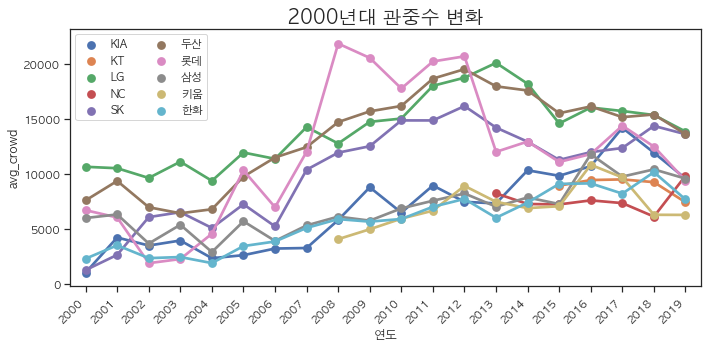

In [248]:
plt.figure(figsize = (10, 5))

df_temp = df3[df3['연도'] >= 2000]
gt = sns.pointplot(x = '연도', y = 'avg_crowd', data = df_temp, hue = '팀')
# order = ['티저', '1화', '2화', '3화', '4화']) #평균이 높이, 편차가 error bar
# gt.set_xlabel("에피소드", fontsize = 17)
# gt.set_ylabel('CPV', fontsize = 18)
gt.set_title("2000년대 관중수 변화", fontsize = 19)
# gt.set(ylim = (0, 30))

gt.set_xticklabels(
    gt.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)
gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('../plot/gross.png', dpi = 300)
plt.show()

In [249]:
# 홈구장 정보. 연도별 좌석수에 들어감
size = pd.DataFrame(df3['팀'].unique(), columns = ['팀'])

In [250]:
size.loc[size['팀'] == 'KIA', 'size_before'] = 12400
size.loc[size['팀'] == 'KIA', 'change_year'] = 2014
size.loc[size['팀'] == 'KIA', 'size_after'] = 20500
size.loc[size['팀'] == 'KT', 'size_after'] = 22067
size.loc[size['팀'] == 'LG', 'size_after'] = 24411
size.loc[size['팀'] == 'NC', 'size_after'] = 22112
size.loc[size['팀'] == 'SK', 'size_after'] = 23000
size.loc[size['팀'] == '두산', 'size_after'] = 24411
size.loc[size['팀'] == '롯데', 'size_after'] = 24500
size.loc[size['팀'] == '삼성', 'size_before'] = 10000
size.loc[size['팀'] == '삼성', 'change_year'] = 2016
size.loc[size['팀'] == '삼성', 'size_after'] = 24331
size.loc[size['팀'] == '키움', 'size_before'] = 12500
size.loc[size['팀'] == '키움', 'change_year'] = 2015
size.loc[size['팀'] == '키움', 'size_after'] = 16784
size.loc[size['팀'] == '한화', 'size_after'] = 13042
size

,팀,size_before,change_year,size_after
0,KIA,12400.0,2014.0,20500.0
1,KT,NaN,NaN,22067.0
2,LG,NaN,NaN,24411.0
3,NC,NaN,NaN,22112.0
4,SK,NaN,NaN,23000.0
5,두산,NaN,NaN,24411.0
6,롯데,NaN,NaN,24500.0
7,삼성,10000.0,2016.0,24331.0
8,키움,12500.0,2015.0,16784.0
9,한화,NaN,NaN,13042.0


In [262]:
# size['change_year'] = size['change_year'].astype(int)

# if not change_year -> size_after, else -> 연도 < change_year -> size_before, else size_after
# 일단 join 하고 거르기
df4 = pd.merge(left=df3, right=size, how='outer', on=['팀'], sort=True)
df4.loc[(df4['size_before'].notnull()) & (df4['연도'] >= df4['change_year']), 'size'] = df4['size_after']
df4.loc[df4['size_before'].isnull(), 'size'] = df4['size_after']
df4.loc[df4['연도'] < df4['change_year'], 'size'] = df4['size_before']

df4.drop(columns=['size_before', 'change_year', 'size_after'], axis=1, inplace=True)

df4

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size
0,KIA,1982,NaN,NaN,NaN,261182,6530,12400.0
1,KIA,1983,NaN,NaN,NaN,377964,7559,12400.0
2,KIA,1984,NaN,NaN,NaN,196278,3926,12400.0
3,KIA,1985,NaN,NaN,NaN,301188,5476,12400.0
4,KIA,1986,NaN,NaN,NaN,307814,5700,12400.0
...,...,...,...,...,...,...,...,...
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0
265,한화,2017,57.0,105.05,1.842982,593251,8240,13042.0
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0


In [332]:
# 스탯티즈 팀 성적 크롤링
# 팀별 순위
df_years = []

for year in range(2008, 2020):
    url = 'http://www.statiz.co.kr/league.php?opt={}&sopt=0'.format(year)
    driver.get(url)

    html = driver.find_element_by_xpath('/html/body/div/div[1]/div/section[2]/div/div[2]/div/div[1]/div[2]').get_attribute("innerHTML")
    # html = driver.find_element_by_xpath('//*[@id="mytable"]/tbody').get_attribute("innerHTML")
    soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
    # soup

    cols = [i.text.strip() for i in soup.findAll("th")] #tr 태그에서, text만 저장하기
    rows = [i.text.strip() for i in soup.findAll("tr")][1:]
    temp = pd.Series(rows)

    rank = pd.DataFrame([a for a in temp.apply(lambda x: [x.split(" ")[0]] + x.split(" ")[1].split("\n"))], columns = cols)
    rank['연도'] = year
    df_years.append(rank)

In [ ]:
result = pd.concat(df_years, ignore_index=True) # 여러 데이터 합치기
result

In [340]:
# 바뀐 팀명 바꾸기
result['팀'].replace({
    '히어로즈': '키움',
    '넥센': '키움',
    'kt': 'KT'
}, inplace=True)

result['팀'].unique()

array(['SK', '두산', '롯데', '삼성', '한화', 'KIA', '키움', 'LG', 'NC', 'KT'],
      dtype=object)

In [341]:
# 최종적으로 df4와 합치기
df5 = pd.merge(left=df4, right=result, how='outer', on=['팀', '연도'], sort=True)
df5

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,승,패,무,승차,승률
0,KIA,1982,NaN,NaN,NaN,261182,6530,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KIA,1983,NaN,NaN,NaN,377964,7559,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KIA,1984,NaN,NaN,NaN,196278,3926,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KIA,1985,NaN,NaN,NaN,301188,5476,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KIA,1986,NaN,NaN,NaN,307814,5700,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,68,76,0,20.0,0.472
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0,7,144,66,75,3,26.0,0.468
265,한화,2017,57.0,105.05,1.842982,593251,8240,13042.0,8,144,61,81,2,25.5,0.430
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,77,67,0,1.5,0.535


In [395]:
# 팀 타격 WAR
war_batting = []

for year in range(2008, 2020):
    url = 'http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys={}&ye={}&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=5&tr=&cv=&ml=1&sn=30&si=&cn='.format(year, year)
    driver.get(url)
    driver.implicitly_wait(5)

    html = driver.find_element_by_xpath('//*[@id="fixcol"]/table/tbody').get_attribute("innerHTML")
    soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
    # soup

    # cols = [i.text.strip() for i in soup.findAll("th")] #tr 태그에서, text만 저장하기
    rows = [i.text.strip() for i in soup.findAll("tr")][7:]
    rank = pd.Series(rows).str.extract('([\d]+)')[0]
    team = pd.Series(rows).str.extract('([a-zA-Z가-힣]+)')[0]
    war = pd.Series(rows).apply(lambda x: x.split(" ")[1])

    df_temp = pd.DataFrame({'rank_bat': rank, '팀': team, 'war_batting': war})
    df_temp['연도'] = year
    war_batting.append(df_temp)

In [396]:
war_battings = pd.concat(war_batting, ignore_index=True) # 여러 데이터 합치기
war_battings

,rank_bat,팀,war_batting,연도
0,1,SK,30.25,2008
1,2,롯데,29.70,2008
2,3,두산,27.38,2008
3,4,한화,23.64,2008
4,5,삼성,21.64,2008
...,...,...,...,...
103,6,SK,19.10,2019
104,7,KIA,17.66,2019
105,8,삼성,17.27,2019
106,9,한화,14.98,2019


In [397]:
war_battings['팀'].replace({
    '히어로즈': '키움',
    '넥센': '키움',
    'kt': 'KT'
}, inplace=True)

war_battings['팀'].unique()

array(['SK', '롯데', '두산', '한화', '삼성', '키움', 'KIA', 'LG', 'NC', 'KT'],
      dtype=object)

In [398]:
# 팀 투구 WAR
war_pitching = []

for year in range(2008, 2020):
    url = 'http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys={}&ye={}&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=5&tr=&cv=&ml=1&sn=30&si=&cn='.format(year, year)
    driver.get(url)
    driver.implicitly_wait(5)

    html = driver.find_element_by_xpath('//*[@id="fixcol"]/table/tbody').get_attribute("innerHTML")
    soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
    # soup

    # cols = [i.text.strip() for i in soup.findAll("th")] #tr 태그에서, text만 저장하기
    rows = [i.text.strip() for i in soup.findAll("tr")][7:]
    rank = pd.Series(rows).str.extract('([\d]+)')[0]
    team = pd.Series(rows).str.extract('([a-zA-Z가-힣]+)')[0]
    war = pd.Series(rows).apply(lambda x: x.split(" ")[1])

    df_temp = pd.DataFrame({'rank_pit': rank, '팀': team, 'war_pitching': war})
    df_temp['연도'] = year
    war_pitching.append(df_temp)

In [399]:
war_pitchings = pd.concat(war_pitching, ignore_index=True) # 여러 데이터 합치기
war_pitchings

,rank_pit,팀,war_pitching,연도
0,1,SK,26.70,2008
1,2,두산,22.89,2008
2,3,롯데,21.94,2008
3,4,KIA,21.21,2008
4,5,삼성,19.63,2008
...,...,...,...,...
103,6,KIA,14.08,2019
104,7,KT,12.47,2019
105,8,롯데,11.97,2019
106,9,한화,11.74,2019


In [401]:
war_pitchings['팀'].replace({
    '히어로즈': '키움',
    '넥센': '키움',
    'kt': 'KT'
}, inplace=True)

war_pitchings['팀'].unique()

array(['SK', '두산', '롯데', 'KIA', '삼성', '키움', '한화', 'LG', 'NC', 'KT'],
      dtype=object)

In [402]:
df6 = pd.merge(left=df5, right=war_battings, how='left', on=['팀', '연도'], sort=True)
df6

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,승,패,무,승차,승률,rank_bat,war_batting
0,KIA,1982,NaN,NaN,NaN,261182,6530,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KIA,1983,NaN,NaN,NaN,377964,7559,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KIA,1984,NaN,NaN,NaN,196278,3926,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KIA,1985,NaN,NaN,NaN,301188,5476,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KIA,1986,NaN,NaN,NaN,307814,5700,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,68,76,0,20.0,0.472,8,15.68
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0,7,144,66,75,3,26.0,0.468,9,17.49
265,한화,2017,57.0,105.05,1.842982,593251,8240,13042.0,8,144,61,81,2,25.5,0.430,7,17.46
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,77,67,0,1.5,0.535,9,12.22


In [403]:
df7 = pd.merge(left=df6, right=war_pitchings, how='left', on=['팀', '연도'], sort=True)
df7

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,승,패,무,승차,승률,rank_bat,war_batting,rank_pit,war_pitching
0,KIA,1982,NaN,NaN,NaN,261182,6530,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KIA,1983,NaN,NaN,NaN,377964,7559,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KIA,1984,NaN,NaN,NaN,196278,3926,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KIA,1985,NaN,NaN,NaN,301188,5476,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KIA,1986,NaN,NaN,NaN,307814,5700,12400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,68,76,0,20.0,0.472,8,15.68,10,11.91
264,한화,2016,57.0,102.10,1.791228,660472,9173,13042.0,7,144,66,75,3,26.0,0.468,9,17.49,7,13.12
265,한화,2017,57.0,105.05,1.842982,593251,8240,13042.0,8,144,61,81,2,25.5,0.430,7,17.46,8,13.70
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,77,67,0,1.5,0.535,9,12.22,2,19.87


In [7]:
final = df7[df7['순'].notnull()]
final['순'] = final['순'].astype(int)
final['war'] = final['war_batting'] + final['war_pitching']
final.sort_values(by=['연도', '순'], ascending=[False, True], inplace = True)

NameError: name 'df7' is not defined

In [6]:
final['연도'].describe() # 2008 ~ 2019

count     108.000000
mean     2013.824074
std         3.452830
min      2008.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2019.000000
Name: 연도, dtype: float64

In [18]:
final.sort_values(by=['연도', '순'], ascending=[False, True], inplace = True)

for col in ['G', '승', '패', '무', 'rank_bat', 'rank_pit']:
    final[col] = final[col].astype(int)

for col in ['승률', 'war_batting', 'war_pitching']:
    final[col] = final[col].astype(float)

final['war'] = final['war_batting'] + final['war_pitching']

In [27]:
# NC 2016년 오류 남. 왜지?
final.loc[final['승률'] == 0, '승률'] = final['승'] / (final['G'] - final['무'])

In [28]:
# final = pd.read_pickle('final_data.pkl')
final.to_pickle('final_data.pkl')
final.to_excel('final_data.xlsx', index=False)